In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Read Data For WA, NY, TX, CA and from 2018 to 2022

In [2]:
df = pd.read_parquet(r"C:\Users\Forcessofnature\Downloads\analyticsDF.parquet")
df

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,total_units_val,debt_to_income_ratio_val,applicant_ethnicitys,co_applicant_ethnicitys,applicant_races,co_applicant_races,denial_reasons
0,2022,5493000YNV8IX4VD3X12,12420,TX,48209,48209010100,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,...,301,623,50,1,43.00000,Hispanic or Latino,Missing,Missing,Missing,Not applicable
1,2022,5493000YNV8IX4VD3X12,28660,TX,48027,48027022504,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,1619,2445,13,1,33.00000,Missing,Missing,Missing,Missing,Not applicable
2,2022,5493000YNV8IX4VD3X12,43300,TX,48181,48181000304,C,FHA:First Lien,Single Family (1-4 Units):Manufactured,Ethnicity Not Available,...,1015,1990,26,1,None,Missing,Missing,White,White,Collateral
3,2022,5493000YNV8IX4VD3X12,15180,TX,48061,48061013500,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,549,765,58,1,-99.00000,Missing,Missing,Missing,Missing,Not applicable
4,2022,5493000YNV8IX4VD3X12,12420,TX,48491,48491020330,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,1069,1353,19,1,20.00000,Not Hispanic or Latino,Missing,Asian,Missing,Not applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9712773,2020,549300VZVN841I2ILS84,33700,CA,06099,06099000805,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,1084,2059,49,1,49.00000,Not Hispanic or Latino,Not Hispanic or Latino,White,White,Not applicable
9712774,2020,549300VZVN841I2ILS84,41740,CA,06073,06073018513,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,1849,2555,24,1,36.00000,Not Hispanic or Latino,Not Hispanic or Latino,White,White,Not applicable
9712775,2020,549300VZVN841I2ILS84,32580,TX,48215,48215024106,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,...,2045,3174,16,1,44.00000,Hispanic or Latino,Hispanic or Latino,White,White,Not applicable
9712776,2020,549300VZVN841I2ILS84,40140,CA,06071,06071011206,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,234,2558,43,1,25.00000,Not Hispanic or Latino,Not Hispanic or Latino,White,White,Not applicable


In [3]:
df.state_code.value_counts()

state_code
TX    4149949
CA    3314041
NY    1249908
WA     998880
Name: count, dtype: int64

In [4]:
df.activity_year.value_counts()

activity_year
2021    2189891
2020    1960324
2022    1874400
2019    1866479
2018    1821684
Name: count, dtype: int64

In [5]:
# size of dataset
len(df)

9712778

In [6]:
# Values:

#     1 - 1 Loan originated
#     2 - 1 Application approved but not accepted
#     3 - 0 Application denied
#     4 - *drop* Application withdrawn by applicant
#     5 - *drop* File closed for incompleteness
#     6 - 1 Purchased loan
#     7 - 0 Preapproval request denied
#     8 - 1 Preapproval request approved but not accepted

selected = df.loc[:, 'action_taken'].isin(['4', '5'])
df_selected = df[~selected]
len(df_selected)

8211413

In [7]:
accepted_selected = df_selected.loc[:, 'action_taken'].isin(['1', '2', '6', '8'])
df_selected.loc[:, 'application_approved'] = 0  # Default value is 0

# Update rows where accepted_selected is True
df_selected.loc[accepted_selected, 'application_approved'] = 1

C:\Users\Forcessofnature\AppData\Local\Temp\ipykernel_161568\2807851931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'application_approved'] = 0  # Default value is 0


In [8]:
df_selected['race_ethnicity'] = df['derived_race'].str.cat(df['derived_ethnicity'], sep='|')

C:\Users\Forcessofnature\AppData\Local\Temp\ipykernel_161568\4016029165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['race_ethnicity'] = df['derived_race'].str.cat(df['derived_ethnicity'], sep='|')


In [9]:
len(df_selected.race_ethnicity.value_counts(dropna=False))

45

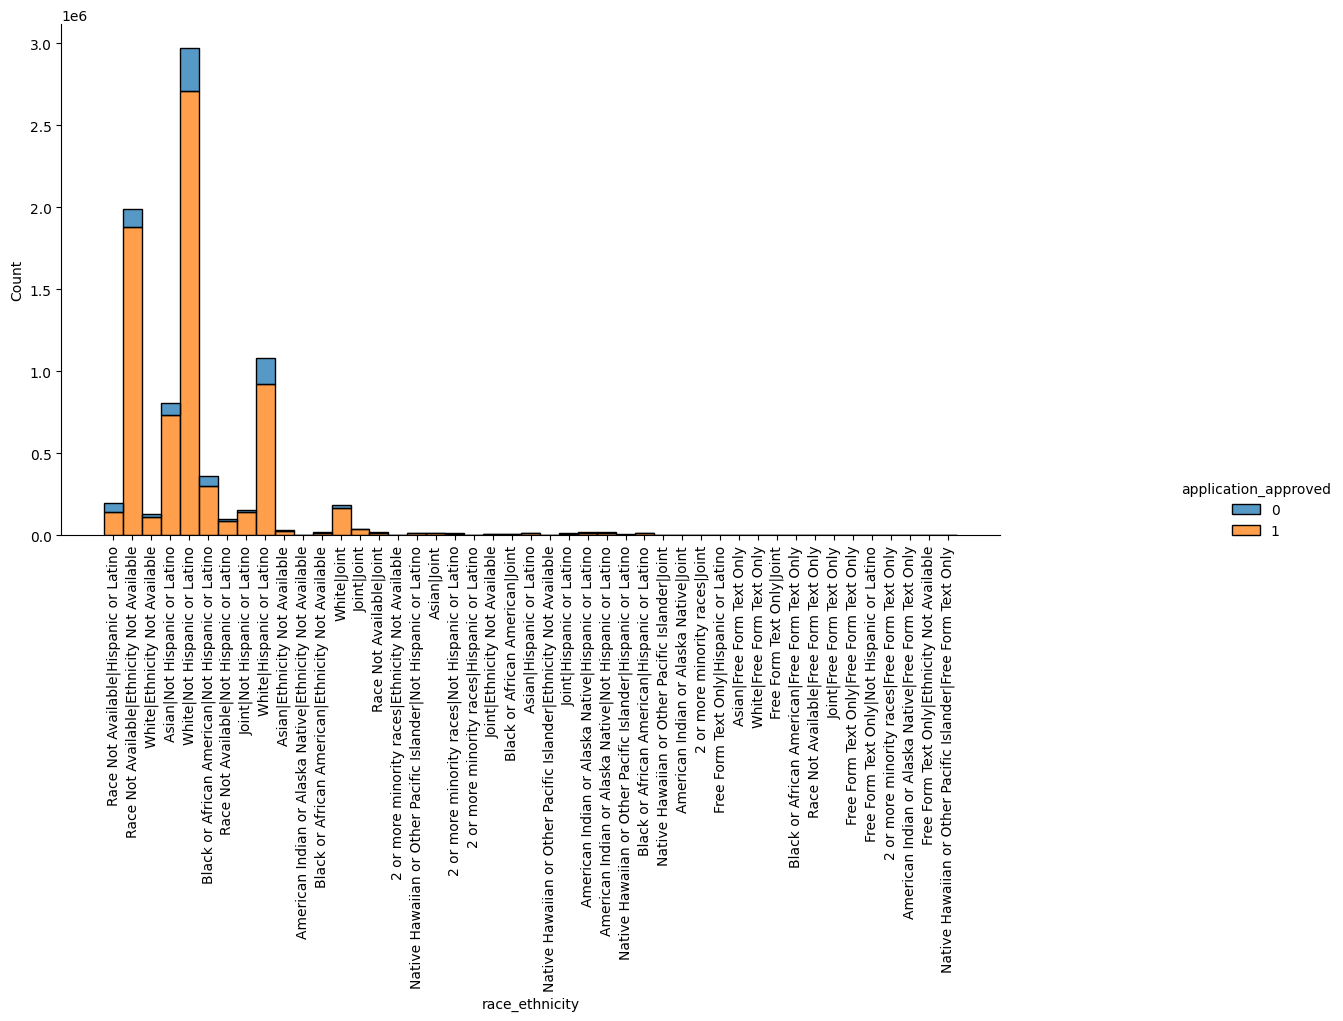

In [19]:
sns.displot(df_selected.loc[:, ['application_approved', 'race_ethnicity']], x="race_ethnicity", hue="application_approved", multiple="stack", height=6, aspect=2)
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [10]:
df_selected_small = df_selected.loc[:, ['application_approved', 'race_ethnicity', 'income']]
data_encoded = pd.get_dummies(df_selected_small, columns=['race_ethnicity'])
data_encoded


,application_approved,income,race_ethnicity_2 or more minority races|Ethnicity Not Available,race_ethnicity_2 or more minority races|Free Form Text Only,race_ethnicity_2 or more minority races|Hispanic or Latino,race_ethnicity_2 or more minority races|Joint,race_ethnicity_2 or more minority races|Not Hispanic or Latino,race_ethnicity_American Indian or Alaska Native|Ethnicity Not Available,race_ethnicity_American Indian or Alaska Native|Free Form Text Only,race_ethnicity_American Indian or Alaska Native|Hispanic or Latino,...,race_ethnicity_Race Not Available|Ethnicity Not Available,race_ethnicity_Race Not Available|Free Form Text Only,race_ethnicity_Race Not Available|Hispanic or Latino,race_ethnicity_Race Not Available|Joint,race_ethnicity_Race Not Available|Not Hispanic or Latino,race_ethnicity_White|Ethnicity Not Available,race_ethnicity_White|Free Form Text Only,race_ethnicity_White|Hispanic or Latino,race_ethnicity_White|Joint,race_ethnicity_White|Not Hispanic or Latino
0,1,72.0,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,1,101.0,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0,74.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1,175.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1,74.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9712773,1,49.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9712774,1,140.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9712775,1,131.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9712776,1,266.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [11]:
len(data_encoded.columns)

47

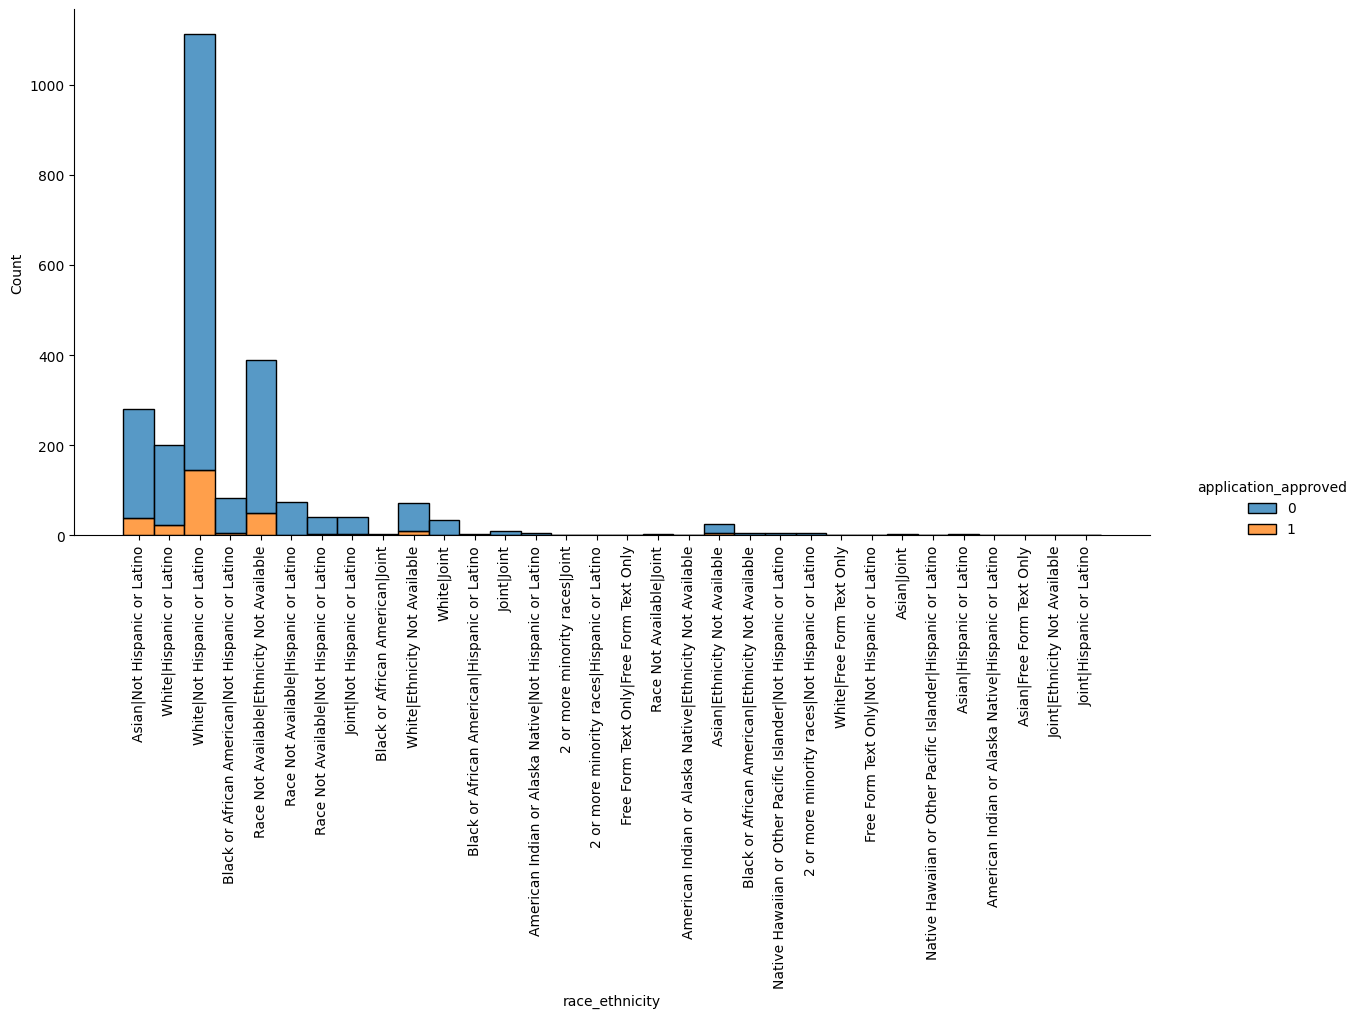

In [36]:
dfNegInccome = df_selected[df_selected.loc[:,'income']<0]
sns.displot(dfNegInccome.loc[:, ['application_approved', 'race_ethnicity']], x="race_ethnicity", hue="application_approved", multiple="stack", height=6, aspect=2)
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [12]:
dfPosInccome = data_encoded[data_encoded.loc[:,'income']>0]

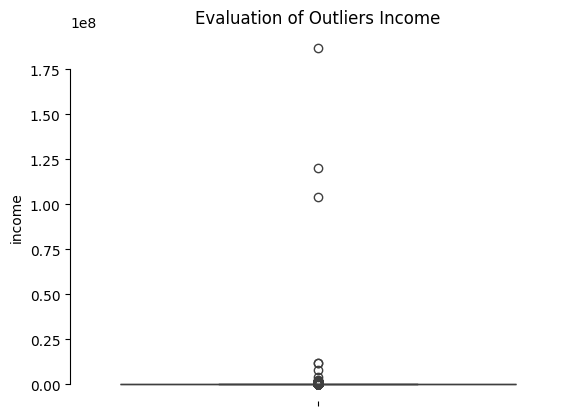

In [14]:
sns.boxplot( y="income",data=dfPosInccome[dfPosInccome.loc[:,'income']>0])
plt.title('Evaluation of Outliers Income')
sns.despine(trim=True)

In [13]:
# Apply log transformation using numpy's log1p function
dfPosInccome['income_log'] = np.log1p(dfPosInccome['income'])

# Convert the 'income_log' column to float64
dfPosInccome['income_log'] = dfPosInccome['income_log'].astype('float64')


C:\Users\Forcessofnature\AppData\Local\Temp\ipykernel_161568\653075495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPosInccome['income_log'] = np.log1p(dfPosInccome['income'])
C:\Users\Forcessofnature\AppData\Local\Temp\ipykernel_161568\653075495.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPosInccome['income_log'] = dfPosInccome['income_log'].astype('float64')


In [14]:
# Step 4: Prepare Data for Logistic Regression
X = dfPosInccome.drop(['application_approved', 'income'], axis=1)  # Features
y = dfPosInccome['application_approved']  # Target variable

In [15]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
#fill any nan values in y with 0
y_train = y_train.fillna(0)

#any nan values in X_train fill with 0
X_train = X_train.fillna(0)

#any nan values in X_train fill with 0
X_train = X_train.fillna(0)

#any nan values in X_test fill with 0
X_test = X_test.fillna(0)


In [17]:
from sklearn.linear_model import LogisticRegression

# Define and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix

              precision    recall  f1-score   support

           0       0.63      0.01      0.02    153621
           1       0.89      1.00      0.94   1245634

    accuracy                           0.89   1399255
   macro avg       0.76      0.50      0.48   1399255
weighted avg       0.86      0.89      0.84   1399255



In [19]:
from sklearn.metrics import accuracy_score
# Step 7: Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8906410911520773


In [20]:
# Extract coefficients and corresponding feature names
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to display coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value to identify significant variables
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display coefficients and feature names
print(coefficients_df)

                                              Feature  Coefficient  \
15  race_ethnicity_Black or African American|Ethni...    -0.926995   
45                                         income_log     0.793592   
37  race_ethnicity_Race Not Available|Hispanic or ...    -0.753660   
44        race_ethnicity_White|Not Hispanic or Latino     0.458261   
43                         race_ethnicity_White|Joint     0.334458   
29        race_ethnicity_Joint|Not Hispanic or Latino     0.319922   
7   race_ethnicity_American Indian or Alaska Nativ...    -0.299954   
14        race_ethnicity_Asian|Not Hispanic or Latino     0.285539   
35  race_ethnicity_Race Not Available|Ethnicity No...     0.285117   
17  race_ethnicity_Black or African American|Hispa...    -0.258446   
19  race_ethnicity_Black or African American|Not H...    -0.217970   
38            race_ethnicity_Race Not Available|Joint    -0.216998   
18     race_ethnicity_Black or African American|Joint    -0.172704   
28                  

In [21]:
# Running code for a svm
from sklearn import svm

# Define and train model
model = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))